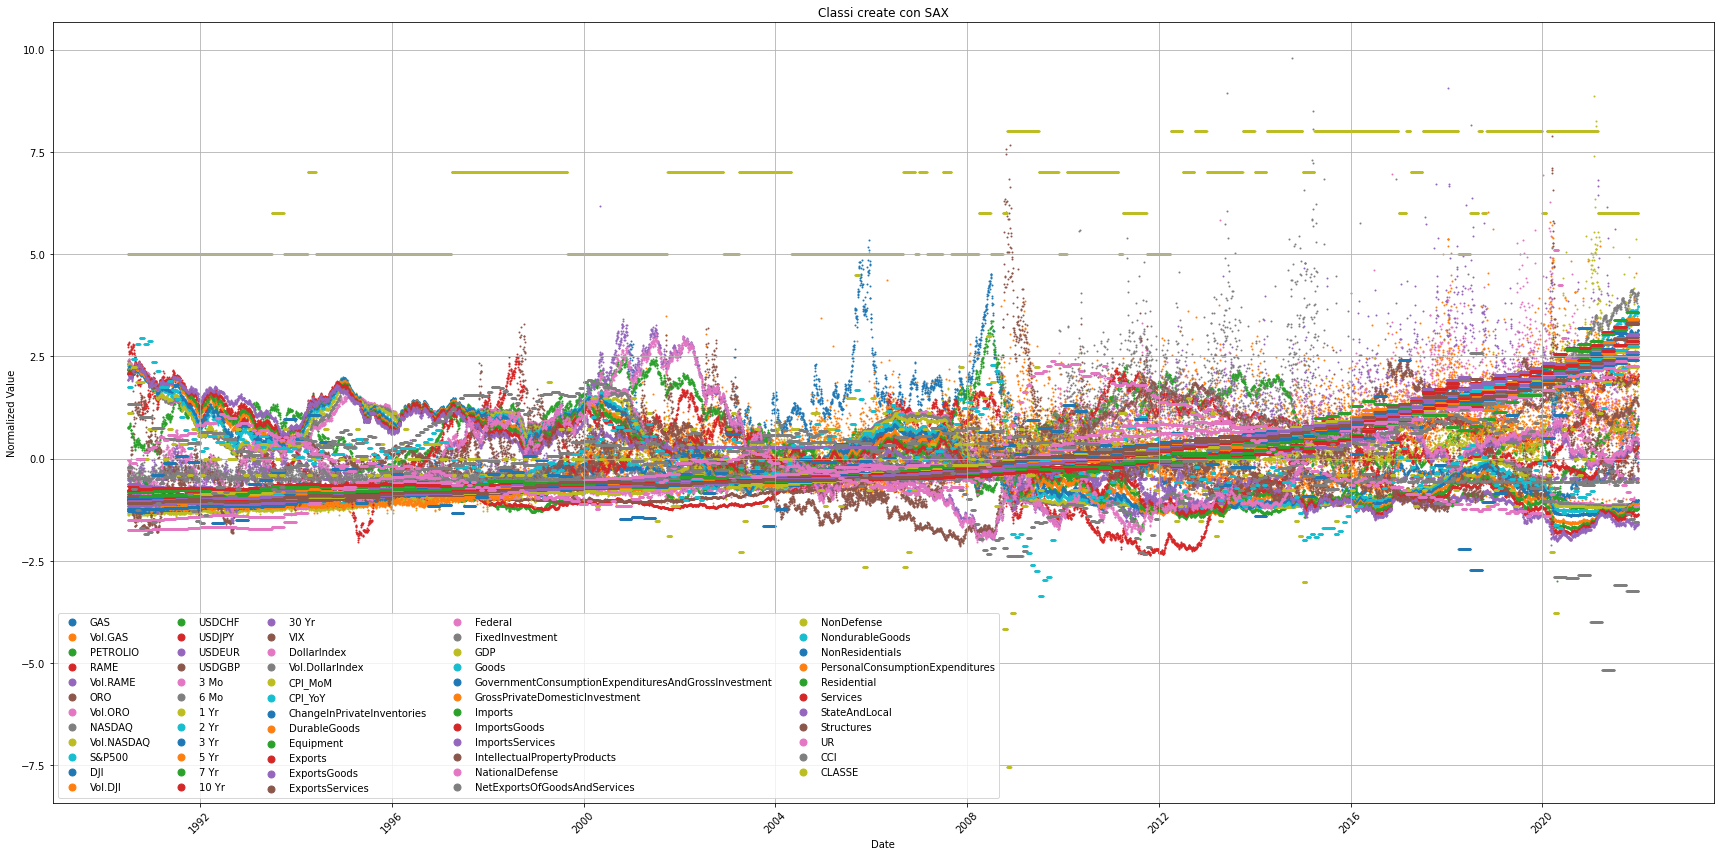

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("DF_Normalizzato_ClasseCreataConSAX.csv")

df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# Creiamo un grafico vuoto   
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Classi create con SAX')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

In [82]:
# Elimino dalle features tutte le variabili che non cambiano giornalmente
features = df.columns.difference(['Date', 'CPI_MoM', 'CPI_YoY', 'ChangeInPrivateInventories',
       'DurableGoods', 'Equipment', 'Exports', 'ExportsGoods',
       'ExportsServices', 'Federal', 'FixedInvestment', 'GDP', 'Goods',
       'GovernmentConsumptionExpendituresAndGrossInvestment',
       'GrossPrivateDomesticInvestment', 'Imports', 'ImportsGoods',
       'ImportsServices', 'IntellectualPropertyProducts', 'NationalDefense',
       'NetExportsOfGoodsAndServices', 'NonDefense', 'NondurableGoods',
       'NonResidentials', 'PersonalConsumptionExpenditures', 'Residential',
       'Services', 'StateAndLocal', 'Structures', 'UR', 'CCI', 'CLASSE'])
features

Index(['1 Yr', '10 Yr', '2 Yr', '3 Mo', '3 Yr', '30 Yr', '5 Yr', '6 Mo',
       '7 Yr', 'DJI', 'DollarIndex', 'GAS', 'NASDAQ', 'ORO', 'PETROLIO',
       'RAME', 'S&P500', 'USDCHF', 'USDEUR', 'USDGBP', 'USDJPY', 'VIX',
       'Vol.DJI', 'Vol.DollarIndex', 'Vol.GAS', 'Vol.NASDAQ', 'Vol.ORO',
       'Vol.RAME'],
      dtype='object')

In [116]:
from sklearn.tree import DecisionTreeClassifier
import warnings

# Ignora tutti i warning
warnings.filterwarnings("ignore")

train_size = int(0.70 * len(df)) # Divido il dataset in training set (70%) e test set (30%)
train_data, test_data = df[:train_size], df[train_size:]

num_states = 4
transition_matrix = np.random.rand(num_states, num_states) # Inizializzo la matrice di transizione come una matrice di 
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True) # probabilita' casuali normalizzata

model = DecisionTreeClassifier() # Addestra un modello di albero decisionale una sola volta sul set di addestramento
model.fit(train_data[features], train_data['CLASSE']) 

# Fase di training
for i in range(1, len(train_data)):
    # Considera le colonne degli attributi come input
    X_train = train_data[features].iloc[i-1].values.reshape(1, -1)
    
    # Considera la colonna della classe come target
    y_train = train_data['CLASSE'].iloc[i-1]
    
    # Estrai le probabilità 
    if(y_train == 5):
        transition_probs = [x for x in model.predict_proba(X_train).reshape(1, -1)[0]]
        tmp = [[0.0, 0.0, 0.0, 0.0] for _ in range(4)]
        tmp[0] = transition_probs
        transition_probs = tmp
    if(y_train == 6):
        transition_probs = [x for x in model.predict_proba(X_train).reshape(1, -1)[0]]
        tmp = [[0.0, 0.0, 0.0, 0.0] for _ in range(4)]
        tmp[1] = transition_probs
        transition_probs = tmp
    if(y_train == 7):
        transition_probs = [x for x in model.predict_proba(X_train).reshape(1, -1)[0]]
        tmp = [[0.0, 0.0, 0.0, 0.0] for _ in range(4)]
        tmp[2] = transition_probs
        transition_probs = tmp
    if(y_train == 8):
        transition_probs = [x for x in model.predict_proba(X_train).reshape(1, -1)[0]]
        tmp = [[0.0, 0.0, 0.0, 0.0] for _ in range(4)]
        tmp[3] = transition_probs
        transition_probs = tmp

    # Aggiorna la matrice di transizione
    transition_matrix += transition_probs
    transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)
    print(transition_matrix)
    print("==========================")

[[0.5652513  0.01240677 0.31095159 0.11139035]
 [0.3407631  0.41419234 0.05394624 0.19109832]
 [0.1882159  0.31108485 0.09219222 0.40850703]
 [0.30918342 0.27230476 0.09811502 0.3203968 ]]
[[0.78262565 0.00620339 0.15547579 0.05569517]
 [0.3407631  0.41419234 0.05394624 0.19109832]
 [0.1882159  0.31108485 0.09219222 0.40850703]
 [0.30918342 0.27230476 0.09811502 0.3203968 ]]
[[0.89131282 0.00310169 0.0777379  0.02784759]
 [0.3407631  0.41419234 0.05394624 0.19109832]
 [0.1882159  0.31108485 0.09219222 0.40850703]
 [0.30918342 0.27230476 0.09811502 0.3203968 ]]
[[0.94565641 0.00155085 0.03886895 0.01392379]
 [0.3407631  0.41419234 0.05394624 0.19109832]
 [0.1882159  0.31108485 0.09219222 0.40850703]
 [0.30918342 0.27230476 0.09811502 0.3203968 ]]
[[9.72828206e-01 7.75423240e-04 1.94344741e-02 6.96189664e-03]
 [3.40763102e-01 4.14192342e-01 5.39462387e-02 1.91098317e-01]
 [1.88215902e-01 3.11084849e-01 9.21922161e-02 4.08507033e-01]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203967

[[1.00000000e+00 1.19472867e-36 2.99435485e-35 1.07265002e-35]
 [3.40763102e-01 4.14192342e-01 5.39462387e-02 1.91098317e-01]
 [1.88215902e-01 3.11084849e-01 9.21922161e-02 4.08507033e-01]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 5.97364335e-37 1.49717742e-35 5.36325009e-36]
 [3.40763102e-01 4.14192342e-01 5.39462387e-02 1.91098317e-01]
 [1.88215902e-01 3.11084849e-01 9.21922161e-02 4.08507033e-01]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 2.98682167e-37 7.48588712e-36 2.68162504e-36]
 [3.40763102e-01 4.14192342e-01 5.39462387e-02 1.91098317e-01]
 [1.88215902e-01 3.11084849e-01 9.21922161e-02 4.08507033e-01]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 1.49341084e-37 3.74294356e-36 1.34081252e-36]
 [3.40763102e-01 4.14192342e-01 5.39462387e-02 1.91098317e-01]
 [1.88215902e-01 3.11084849e-01 9.21922161e-02 4.08507033e-01]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 2.80879360e-74 7.03969441e-73 2.52178807e-73]
 [3.40763102e-01 4.14192342e-01 5.39462387e-02 1.91098317e-01]
 [1.88215902e-01 3.11084849e-01 9.21922161e-02 4.08507033e-01]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 1.40439680e-74 3.51984721e-73 1.26089404e-73]
 [3.40763102e-01 4.14192342e-01 5.39462387e-02 1.91098317e-01]
 [1.88215902e-01 3.11084849e-01 9.21922161e-02 4.08507033e-01]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 7.02198401e-75 1.75992360e-73 6.30447018e-74]
 [3.40763102e-01 4.14192342e-01 5.39462387e-02 1.91098317e-01]
 [1.88215902e-01 3.11084849e-01 9.21922161e-02 4.08507033e-01]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 3.51099200e-75 8.79961802e-74 3.15223509e-74]
 [3.40763102e-01 4.14192342e-01 5.39462387e-02 1.91098317e-01]
 [1.88215902e-01 3.11084849e-01 9.21922161e-02 4.08

[[1.00000000e+000 5.53936866e-105 1.38833493e-103 4.97335005e-104]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 2.76968433e-105 6.94167463e-104 2.48667503e-104]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.38484217e-105 3.47083732e-104 1.24333751e-104]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 6.92421083e-106 1.73541866e-104 6.21668756e-105]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.0850703

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 3.41389951e-137 8.55627459e-136 3.06506361e-136]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.70694976e-137 4.27813729e-136 1.53253181e-136]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 8.53474878e-138 2.13906865e-136 7.66265903e-137]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 4.26737439e-138 1.06953432e-136 3.83132952e-137]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.910983

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 2.36886865e-154 5.93710816e-153 2.12681512e-153]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.18443433e-154 2.96855408e-153 1.06340756e-153]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 5.92217163e-155 1.48427704e-153 5.31703780e-154]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 2.96108582e-155 7.42138520e-154 2.65851890e-154]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.910983

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 3.13517156e-177 7.85769722e-176 2.81481638e-176]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.56758578e-177 3.92884861e-176 1.40740819e-176]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 7.83792889e-178 1.96442430e-176 7.03704094e-177]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 3.91896445e-178 9.82212152e-177 3.51852047e-177]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.910983

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.65974600e-199 4.15983027e-198 1.49015138e-198]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 8.29873001e-200 2.07991514e-198 7.45075691e-199]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 4.14936501e-200 1.03995757e-198 3.72537845e-199]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 2.07468250e-200 5.19978784e-199 1.86268923e-199]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.910983

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 5.36292857e-226 1.34411365e-224 4.81493880e-225]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 2.68146429e-226 6.72056827e-225 2.40746940e-225]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.34073214e-226 3.36028413e-225 1.20373470e-225]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.91098317e-001]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 6.70366072e-227 1.68014207e-225 6.01867350e-226]
 [3.40763102e-001 4.14192342e-001 5.39462387e-002 1.910983

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.95102205e-237 4.88985698e-236 1.75166453e-236]
 [2.47937789e-012 1.00000000e+000 3.92510546e-013 1.39042325e-012]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.95102205e-237 4.88985698e-236 1.75166453e-236]
 [1.23968894e-012 1.00000000e+000 1.96255273e-013 6.95211627e-013]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.95102205e-237 4.88985698e-236 1.75166453e-236]
 [6.19844472e-013 1.00000000e+000 9.81276366e-014 3.47605813e-013]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.95102205e-237 4.88985698e-236 1.75166453e-236]
 [3.09922236e-013 1.00000000e+000 4.90638183e-014 1.738029

[[1.00000000e+000 4.13144989e-259 1.03546749e-257 3.70929393e-258]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 2.06572495e-259 5.17733747e-258 1.85464696e-258]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.03286247e-259 2.58866873e-258 9.27323481e-259]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.08507033e-001]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 5.16431237e-260 1.29433437e-258 4.63661741e-259]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [1.88215902e-001 3.11084849e-001 9.21922161e-002 4.0850703

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 3.41745525e-283 8.56518635e-282 3.06825602e-282]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.13976707e-014 3.53662528e-014 1.00000000e+000 4.64418727e-014]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.70872763e-283 4.28259318e-282 1.53412801e-282]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.13976707e-014 3.53662528e-014 1.00000000e+000 4.64418727e-014]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 8.54363813e-284 2.14129659e-282 7.67064005e-283]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.13976707e-014 3.53662528e-014 1.00000000e+000 4.64418727e-014]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 4.27181907e-284 1.07064829e-282 3.83532003e-283]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.589865

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 4.21233882e-315 1.05574073e-313 3.78191754e-314]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.13976707e-014 3.53662528e-014 1.00000000e+000 4.64418727e-014]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 2.10616941e-315 5.27870364e-314 1.89095877e-314]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.13976707e-014 3.53662528e-014 1.00000000e+000 4.64418727e-014]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 1.05308470e-315 2.63935182e-314 9.45479384e-315]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.13976707e-014 3.53662528e-014 1.00000000e+000 4.64418727e-014]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 5.26542349e-316 1.31967591e-314 4.72739692e-315]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.589865

 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64

 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64

 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64

 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64

 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64418727e-14]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.13976707e-14 3.53662528e-14 1.00000000e+00 4.64

 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [1.33735442e-15 2.21039080e-15 1.00000000e+00 2.90261704e-15]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [6.68677209e-16 1.10519540e-15 1.00000000e+00 1.45130852e-15]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [3.34338605e-16 5.52597700e-16 1.00000000e+00 7.25654261e-16]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [1.67169302e-16 2.76298850e-16 1.00000000e+00 3.62

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.57565092e-49 4.25705783e-49 1.00000000e+00 5.59023708e-49]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [1.28782546e-49 2.12852892e-49 1.00000000e+00 2.79511854e-49]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [6.43912730e-50 1.06426446e-49 1.00000000e+00 1.39755927e-49]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [3.21956365e-50 5.32132229e-50 1.00000000e+00 6.98779636e-50]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [1.01591516e-79 1.67911325e-79 1.00000000e+00 2.20495974e-79]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [5.07957579e-80 8.39556623e-80 1.00000000e+00 1.10247987e-79]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [2.53978790e-80 4.19778312e-80 1.00000000e+00 5.51239936e-80]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [1.26989395e-80 2.09889156e-80 1.00000000e+00 2.75619968e-80]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [3.91316285e-113 6.46770896e-113 1.00000000e+000 8.49319599e-113]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [1.95658142e-113 3.23385448e-113 1.00000000e+000 4.24659800e-113]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.78290712e-114 1.61692724e-113 1.00000000e+000 2.12329900e-113]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [4.89145356e-114 8.08463620e-114 1.00000000e+000 1.0616495

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [1.26441111e-139 2.08982948e-139 1.00000000e+000 2.74429963e-139]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [6.32205555e-140 1.04491474e-139 1.00000000e+000 1.37214982e-139]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [3.16102778e-140 5.22457369e-140 1.00000000e+000 6.86074908e-140]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.589865

[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [1.94813378e-172 3.21989214e-172 1.00000000e+000 4.22826307e-172]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.74066888e-173 1.60994607e-172 1.00000000e+000 2.11413154e-172]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [4.87033444e-173 8.04973034e-173 1.00000000e+000 1.05706577e-172]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.43516722e-173 4.02486517e-173 1.00000000e+000 5.2853288

[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.0846946

[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.0846946

[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.0846946

[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.0846946

[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.08469465e-203]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [9.60504109e-204 1.58752939e-203 1.00000000e+000 2.0846946

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [8.73573398e-216 1.44384957e-215 1.00000000e+000 1.89601874e-215]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [4.36786699e-216 7.21924785e-216 1.00000000e+000 9.48009368e-216]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.18393349e-216 3.60962392e-216 1.00000000e+000 4.74004684e-216]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.589865

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [4.30704938e-247 7.11872799e-247 1.00000000e+000 9.34809410e-247]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.15352469e-247 3.55936400e-247 1.00000000e+000 4.67404705e-247]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [1.07676235e-247 1.77968200e-247 1.00000000e+000 2.33702353e-247]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.589865

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [8.69801696e-275 1.43761567e-274 1.00000000e+000 1.88783257e-274]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [4.34900848e-275 7.18807834e-275 1.00000000e+000 9.43916285e-275]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.17450424e-275 3.59403917e-275 1.00000000e+000 4.71958143e-275]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.589865

 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.94700278e-295 4.87083135e-295 1.00000000e+000 6.39622554e-295]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.94700278e-295 4.87083135e-295 1.00000000e+000 6.39622554e-295]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [2.94700278e-295 4.87083135e-295 1.00000000e+000 6.39622554e-295]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.589865

[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [6.39029363e-314 1.05619319e-313 1.00000000e+000 1.38696033e-313]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [3.19514681e-314 5.28096593e-314 1.00000000e+000 6.93480163e-314]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [1.59757341e-314 2.64048296e-314 1.00000000e+000 3.46740081e-314]
 [3.09183425e-001 2.72304761e-001 9.81150170e-002 3.20396797e-001]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [4.61820119e-021 1.00000000e+000 7.31107865e-022 2.58986513e-021]
 [7.98786703e-315 1.32024148e-314 1.00000000e+000 1.7337004

 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.61820119e-21 1.00000000e+00 7.31107865e-22 2.58986513e-21]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.25882971e-41 1.00000000e+00 9.90835920e-42 3.50992175e-41]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.12941486e-41 1.00000000e+00 4.95417960e-42 1.75496087e-41]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.56470743e-41 1.00000000e+00 2.47708980e-42 8.77480437e-42]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.20396797e-01]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.82353714e-42 1.00000000e+00 1.23854490e-42 4.38740219e-42]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.09183425e-01 2.72304761e-01 9.81150170e-02 3.203

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.19688168e-26 2.81556524e-26 1.01448550e-26 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.59844084e-26 1.40778262e-26 5.07242749e-27 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [7.99220421e-27 7.03891310e-27 2.53621375e-27 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.99610210e-27 3.51945655e-27 1.26810687e-27 1.000

 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.000

 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.49222129e-47 1.00000000e+00 2.36233692e-48 8.36830556e-48]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.000

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.28623675e-51 1.00000000e+00 1.15348482e-51 4.08608670e-51]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.64311838e-51 1.00000000e+00 5.76742412e-52 2.04304335e-51]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.82155919e-51 1.00000000e+00 2.88371206e-52 1.02152167e-51]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.10779594e-52 1.00000000e+00 1.44185603e-52 5.10760837e-52]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.000

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.48155529e-87 1.00000000e+00 8.67785533e-88 3.07402997e-87]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.48155529e-87 1.00000000e+00 8.67785533e-88 3.07402997e-87]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.48155529e-87 1.00000000e+00 8.67785533e-88 3.07402997e-87]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.48155529e-87 1.00000000e+00 8.67785533e-88 3.07402997e-87]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.000

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.48155529e-87 1.00000000e+00 8.67785533e-88 3.07402997e-87]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.48155529e-87 1.00000000e+00 8.67785533e-88 3.07402997e-87]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.48155529e-87 1.00000000e+00 8.67785533e-88 3.07402997e-87]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.48155529e-87 1.00000000e+00 8.67785533e-88 3.07402997e-87]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [5.16484091e-53 4.54879097e-53 1.63898972e-53 1.000

In [111]:
# Fase di testing
predictions = []

for i in range(1, len(test_data)):
    # Considera le colonne degli attributi come input
    X_test = test_data[features].iloc[i-1].values.reshape(1, -1)
    
    # Calcola le probabilità predette
    transition_probs = model.predict_proba(X_test).reshape(1, -1)
    
    # Seleziona la transizione più probabile
    predicted_class = np.argmax(transition_probs)
    predictions.append(predicted_class)

# Calcola l'accuratezza
accuracy = accuracy_score(test_data['CLASSE'].iloc[1:], predictions)
print(f'Accuracy: {accuracy}')

# Visualizza la matrice di confusione
conf_matrix = confusion_matrix(test_data['CLASSE'].iloc[1:], predictions)
print('Confusion Matrix:')
print(conf_matrix)

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

Accuracy: 0.0
Confusion Matrix:
[[   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0   65    0    0    0    0]
 [   0  103   38  218    0    0    0    0]
 [ 139    3   68  210    0    0    0    0]
 [ 111  139   57 1322    0    0    0    0]]


C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f